## Ajuste de los parámetros del modelo a datos reales de defunciones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle 
plt.rcParams["font.family"] = "Tahoma"

In [2]:
from model import SEIRDmodel

Cargamos los datos que queremos usar (totales, por entidad, cdmx):

In [3]:
modelo = SEIRDmodel()

La siguiente línea de código es la que debería correrse para realizar el ajuste.

In [4]:
ajuste = modelo.ajustar()

In [8]:
ajuste

array([5.05881276e-05, 5.88852510e-01, 6.24829554e-01, 4.94209617e-01,
       5.56760687e-01, 5.28613825e-01, 3.76053134e-01, 7.75110748e-01,
       4.94360700e-01])

In [7]:
ajusteviejito=[4.95362908e-05, 6.06378777e-01, 6.40494148e-01, 5.01421018e-01,
       5.71231191e-01, 5.39650426e-01, 3.83002971e-01, 8.18228026e-01,
       5.02468014e-01]

In [17]:
with open('D:/Edgar Trejo/Universidad/BioMatematica/Modeling COVID-19 Spreading in the ZMVM/results/ajuste8regiones.pkl', 'wb') as handle:
    pickle.dump(ajusteviejito, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [10]:
ynor = modelo.simular()

In [11]:
defunciones = ynor[[5*i + 4 for i in range(8)]]

In [12]:
casos = pd.read_csv("https://raw.githubusercontent.com/edtrelo/BioMatematica/main/Modeling%20COVID-19%20Spreading%20in%20the%20ZMVM/data/cleandata/datos_epi/defunciones_reg.csv",
                   index_col = 0)

In [13]:
casos

,17-03-2020,18-03-2020,19-03-2020,20-03-2020,21-03-2020,22-03-2020,23-03-2020,24-03-2020,25-03-2020,26-03-2020,...,16-02-2023,17-02-2023,18-02-2023,19-02-2023,20-02-2023,21-02-2023,22-02-2023,23-02-2023,24-02-2023,25-02-2023
region,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,0,0,0,...,0,2,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,4,1,2,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,1,1,...,0,1,1,0,1,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,1,...,0,1,1,1,0,1,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0


In [14]:
acumcasos = casos.cumsum(axis = 1)

In [15]:
acumcasos.iloc[i, 0:74]

NameError: name 'i' is not defined

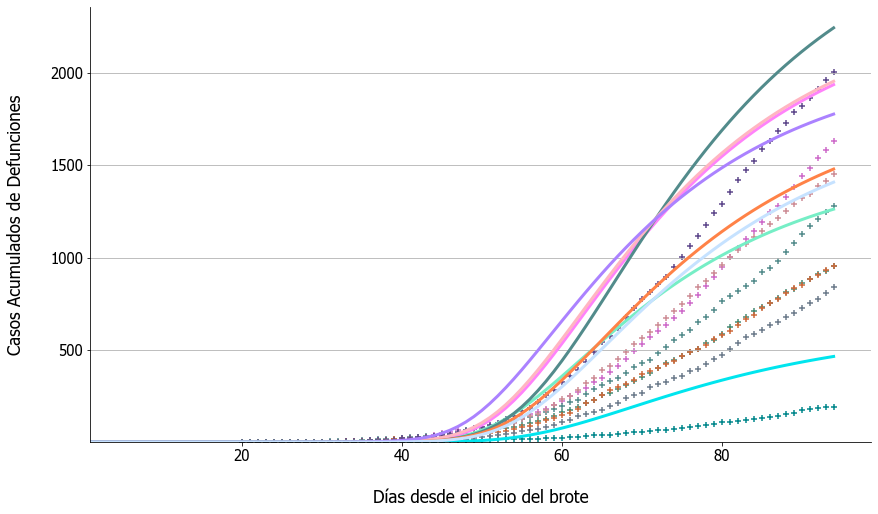

In [16]:
fig, ax = plt.subplots()

solid = ['#76EEC6', '#FF83FA', '#528B8B', '#FFB6C1', '#FF8247', '#00E5EE', '#AB82FF', '#C6E2FF']
dots = ['#458B74', '#CD69C9', '#528B8B', '#CD8C95', '#CD6839', '#00868B', '#5D478B', '#6C7B8B']

tsolid = np.linspace(0, 94, 95)
tdots = np.linspace(20, 94, 75)

for i, _ in enumerate(defunciones):
    ax.plot(tsolid, _, label = 'I(t) en Region {}'.format(i+1), 
            linewidth = 3, color = solid[i])

for i in range(8):
    ax.scatter(tdots, acumcasos.iloc[i, 0:75], color = dots[i], label = 'casos reales Region {}'.format(i+1),
              marker = '+', )

ax.set_xlabel('\nDías desde el inicio del brote', fontsize = 17)
ax.set_ylabel('Casos Acumulados de Defunciones\n', fontsize = 17)
ax.spines[['right', 'top']].set_visible(False)
ax.grid(axis = 'y')
ax.tick_params(axis='both', labelsize=15)
ax.set_xlim(1)
ax.set_ylim(1)
fig.set_size_inches(14, 8)
plt.show()